# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/gdrive/MyDrive/github/compresive_strength_concrete.csv")

data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Checking Missing values

In [4]:
# Checking NaN Values
for column in data.columns:
  print(column, np.isnan(data[column]).sum())
# So there is no NaN value

Cement (component 1)(kg in a m^3 mixture) 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture) 0
Fly Ash (component 3)(kg in a m^3 mixture) 0
Water  (component 4)(kg in a m^3 mixture) 0
Superplasticizer (component 5)(kg in a m^3 mixture) 0
Coarse Aggregate  (component 6)(kg in a m^3 mixture) 0
Fine Aggregate (component 7)(kg in a m^3 mixture) 0
Age (day) 0
Concrete compressive strength(MPa, megapascals)  0


# Standardizing

In [10]:
x = data.iloc[:, :8]
y = data.iloc[:, 8:]

print(x.head()) # Input 
print(y.head()) # Output

   Cement (component 1)(kg in a m^3 mixture)  ...  Age (day)
0                                      540.0  ...         28
1                                      540.0  ...         28
2                                      332.5  ...        270
3                                      332.5  ...        365
4                                      198.6  ...        360

[5 rows x 8 columns]
   Concrete compressive strength(MPa, megapascals) 
0                                             79.99
1                                             61.89
2                                             40.27
3                                             41.05
4                                             44.30


# Splitting

In [11]:
length = len(x)

# 50% Training
x_train = x.loc[0: length/2]
y_train = y.loc[0: length/2]

# 30% Test
x_test = x.loc[length/2 + 1: 4/5*length]
y_test = y.loc[length/2 +1: 4/5*length]

# 20% Validation
x_validate = x.loc[4/5*length + 1:]
y_validate = y.loc[4/5*length + 1:]

# Checking
print(len(x_train)/length, len(x_test)/length, len(x_validate)/length)

0.5009708737864078 0.3 0.19902912621359223


# Model

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(8, ))) # Input Layer
model.add(layers.Dense(10, activation='relu')) # Hidden Layer 1
model.add(layers.Dense(8, activation='relu')) # Hidden Layer 2
model.add(layers.Dense(6, activation='relu')) # Hidden Layer 3
model.add(layers.Dense(1)) # Output Layer

# Compilation

In [14]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Training

In [28]:
history = model.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_validate, y_validate), verbose=0)

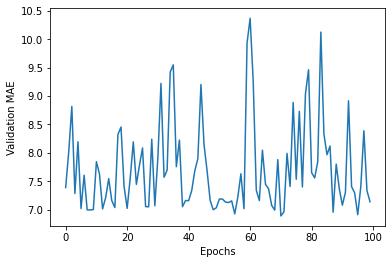

In [21]:
import matplotlib.pyplot as plt

val_mae = history.history['val_mae']

plt.plot(range(0, len(val_mae)), val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Changin Layer, epochs

In [27]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(8, ))) # Input Layer
model.add(layers.Dense(6, activation='relu')) # Hidden Layer
model.add(layers.Dense(1)) # Output Layer
# Compilation
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Running
history = model.fit(x_train, y_train, epochs=200, batch_size=512, validation_data=(x_validate, y_validate), verbose=0)

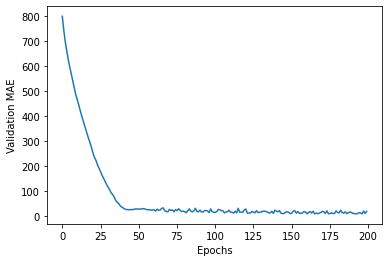

In [25]:
import matplotlib.pyplot as plt

val_mae = history.history['val_mae']

plt.plot(range(0, len(val_mae)), val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Final Model

In [26]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(8, ))) # Input Layer
model.add(layers.Dense(6, activation='relu')) # Hidden Layer
model.add(layers.Dense(1)) # Output Layer
# Compilation
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Running, epochs = 60
history = model.fit(x_train, y_train, epochs=60, batch_size=512, validation_data=(x_validate, y_validate), verbose=0)

# Predict

In [36]:
prediction = model.predict(x_validate)
original = y_validate

print(prediction - original) # Almost Close Result

      Concrete compressive strength(MPa, megapascals) 
825                                          12.226864
826                                          26.343486
827                                           2.409445
828                                         -20.187918
829                                           0.701902
...                                                ...
1025                                         -4.941743
1026                                         17.895451
1027                                         11.904980
1028                                         12.207493
1029                                          2.340154

[205 rows x 1 columns]


# Evaluation

In [29]:
model.evaluate(x_test, y_test) # MAE = 19.47

10/10 [==============================] - 0s 1ms/step - loss: 479.1519 - mae: 19.4708


[479.15185546875, 19.470802307128906]